In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go


In [220]:
df1=pd.read_csv('/content/test data house price.csv')
df2=pd.read_csv('/content/train data house price.csv')
frames=[df1,df2]

In [221]:
df = pd.concat(frames)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [222]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [224]:
#deal with missing values
df.isna().sum()/df.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 81, dtype: float64

In [225]:
from sklearn.impute import SimpleImputer, KNNImputer


In [226]:
knniputer = KNNImputer()


In [227]:
knniputer.fit(df[["LotFrontage"]])
df["LotFrontage"] = knniputer.transform(df[["LotFrontage"]])
df["LotFrontage"] = df["LotFrontage"].apply(lambda x: int(x))
df["LotFrontage"].unique()

array([ 80,  81,  74,  78,  43,  75,  69,  63,  85,  70,  26,  21,  24,
       102,  94,  90,  79, 110, 105,  41, 100,  67,  60,  73,  92,  84,
        39,  88,  25,  30,  57,  68,  98, 120,  87, 119,  65,  56,  50,
        53,  52,  51,  72,  86, 124,  44,  83,  64,  82,  38,  89,  35,
        58,  66,  93,  31,  76,  28,  61,  95, 129,  59,  77,  96,  47,
        34, 117,  48,  62,  42, 106, 112,  32, 115,  71,  45, 109, 113,
       125, 101, 104, 108, 130, 135,  36,  55, 136,  97,  91,  37,  22,
       103,  99,  40, 123,  54, 107, 150, 160, 195, 128,  33, 118, 134,
       155, 126,  46, 149, 200, 121, 131, 114,  49, 133, 140, 122, 141,
       174, 116, 111, 137, 144, 313, 168, 182, 138, 152, 153])

In [228]:
df.drop(columns=["Id", "MiscFeature", "Fence", "PoolQC", "FireplaceQu", "Alley"], 
       axis=1, inplace=True)


In [229]:
df.dropna(axis=0,inplace=True)

In [230]:
df.shape

(1338, 75)

In [231]:
df["MoSold"].value_counts()

6     235
7     215
5     187
4     127
8     112
3      94
10     84
11     75
9      55
12     52
1      52
2      50
Name: MoSold, dtype: int64

In [232]:
df["MSSubClass"].value_counts()

20     502
60     294
50     129
120     86
160     61
70      57
80      57
30      51
90      28
190     21
85      19
75      14
45       9
180      6
40       4
Name: MSSubClass, dtype: int64

In [233]:
df["MSZoning"].value_counts()

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

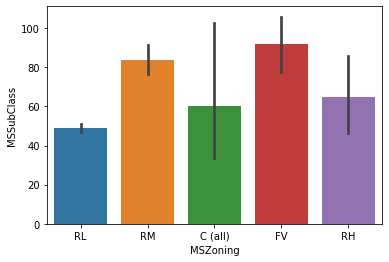

In [234]:
sns.barplot(data=df,x='MSZoning',y='MSSubClass')

In [235]:
px.histogram(data_frame=df, x="MSSubClass", color="MSZoning")

In [236]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,70.438714,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,...,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,22.170305,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,...,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,69.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,...,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,80.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,...,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [237]:
df['SalePrice'].describe()


count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [238]:
#Relationship with numerical colomns

num = df.select_dtypes("number").columns
num

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [239]:
col=['LotFrontage','LotArea','YrSold','MSZoning']

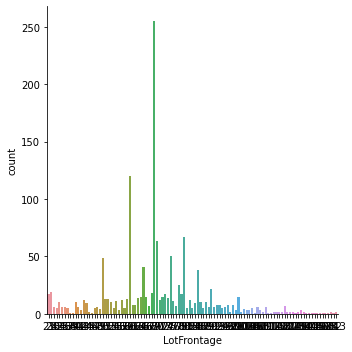

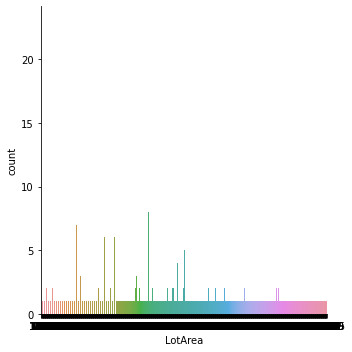

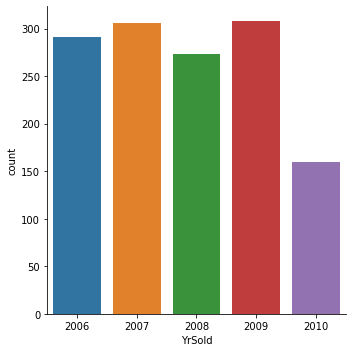

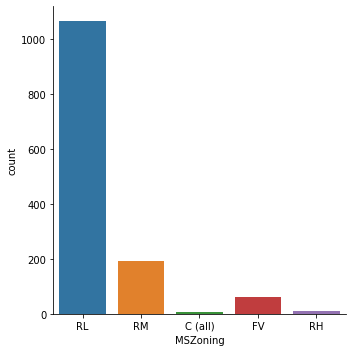

In [240]:
for i in col:
  sns.catplot(data=df,x=i,kind='count')


In [241]:
px.histogram(data_frame=df, x="LotFrontage", y="LotArea", facet_col="YrSold" ,color="MSZoning", 
            category_orders={"YrSold":[2006, 2007, 2008, 2009, 2010]})

In [242]:
px.scatter_3d(data_frame=df, x="YrSold", y="MoSold", z="SalePrice", color="YrSold")

In [243]:
px.line_3d(data_frame=df, x="YrSold", y="MoSold", z="SalePrice", 
          color="YrSold")

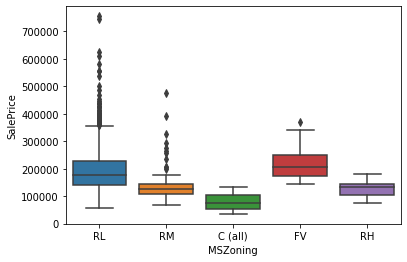

In [244]:
sns.boxplot(data=df, y="SalePrice", x="MSZoning")

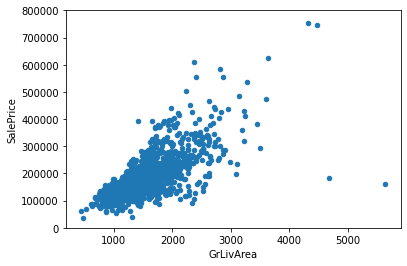

In [245]:

df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));


In [246]:
px.histogram(data_frame=df, x="LotFrontage", y="SalePrice", color="BedroomAbvGr")

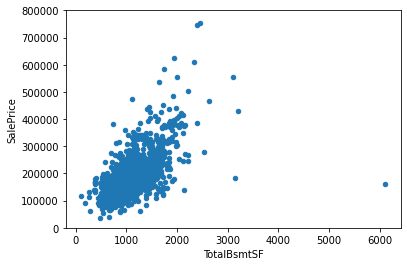

In [247]:
df.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));


In [248]:
cats = df.select_dtypes("object").columns
cats

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

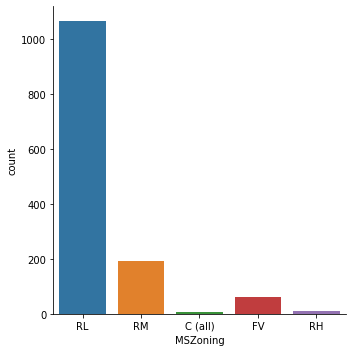

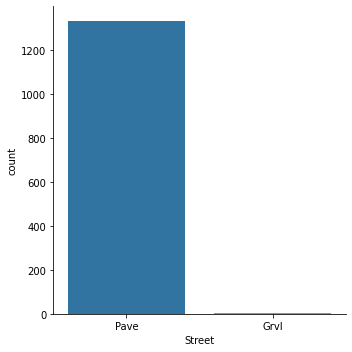

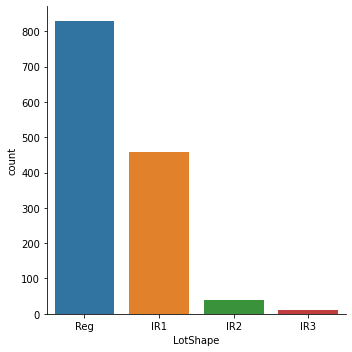

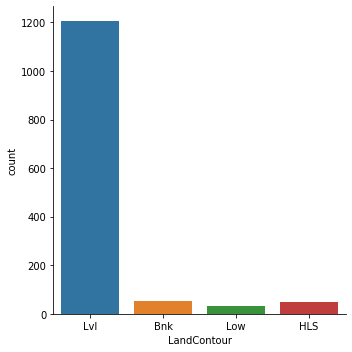

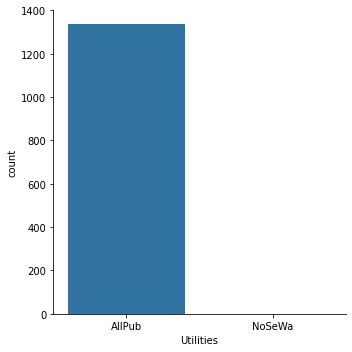

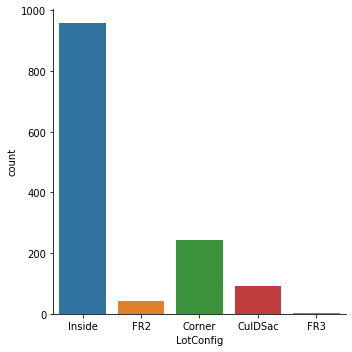

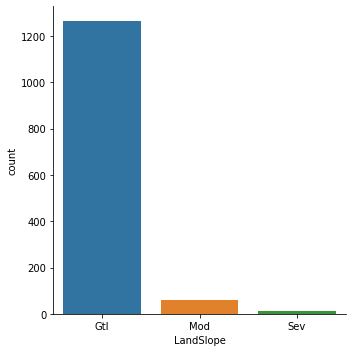

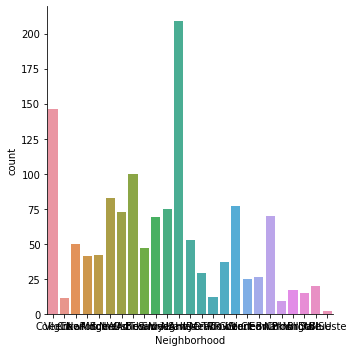

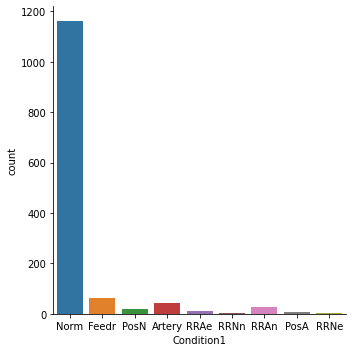

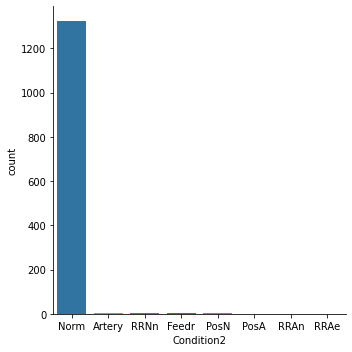

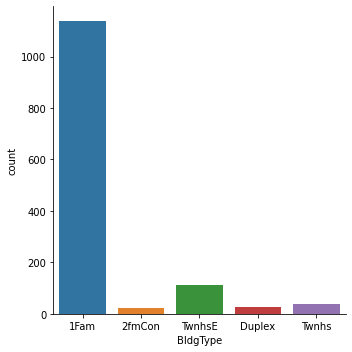

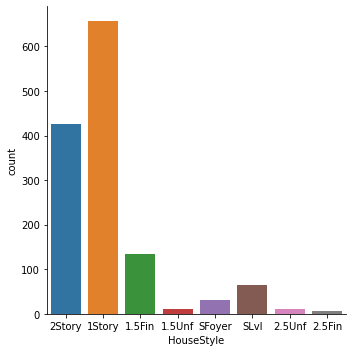

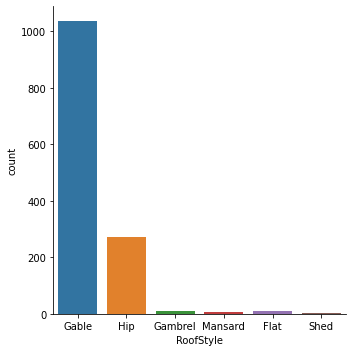

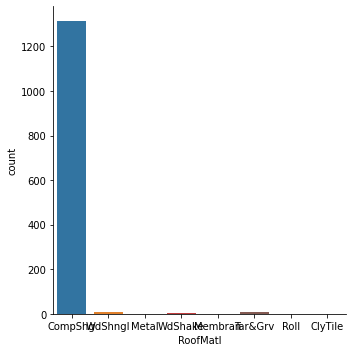

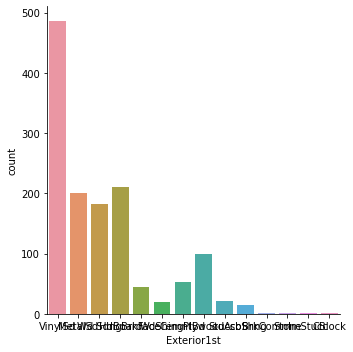

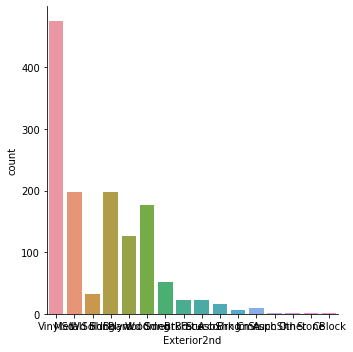

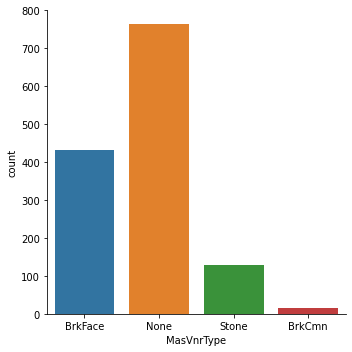

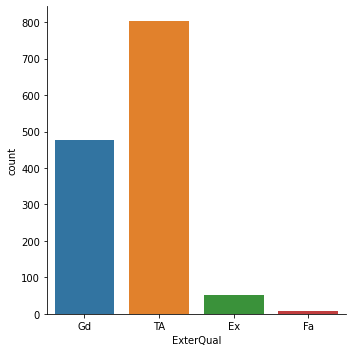

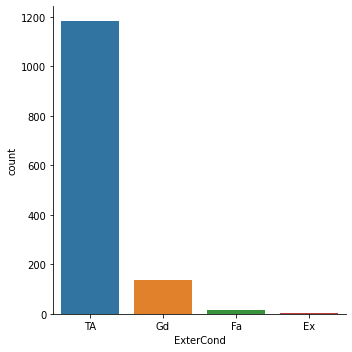

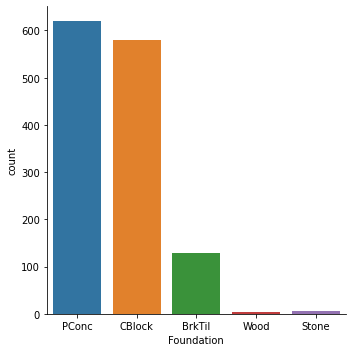

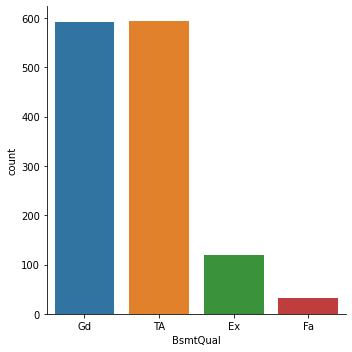

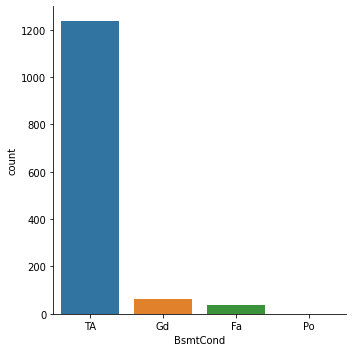

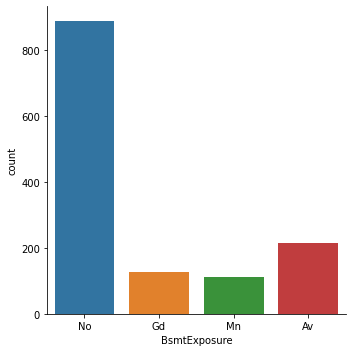

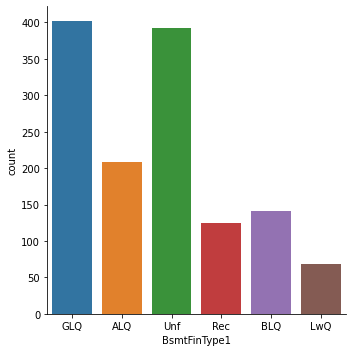

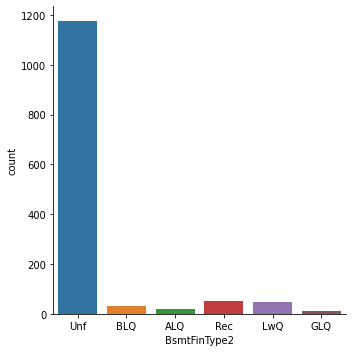

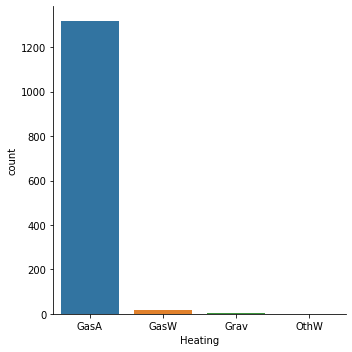

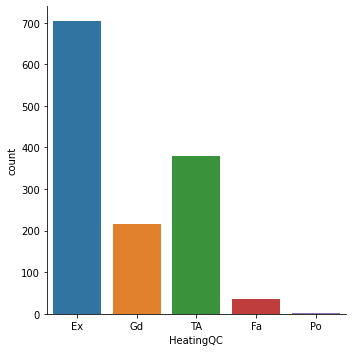

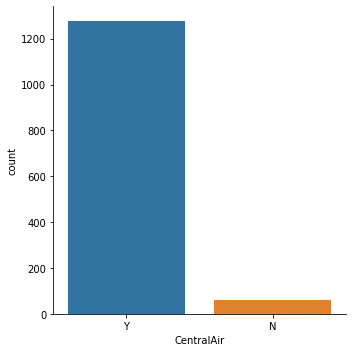

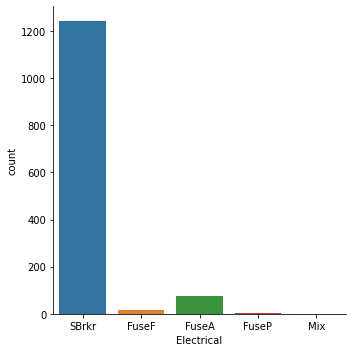

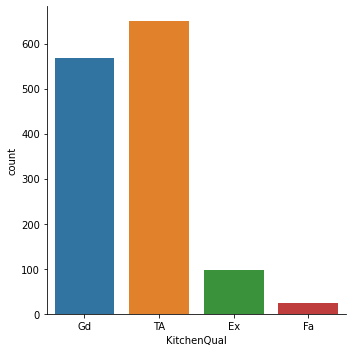

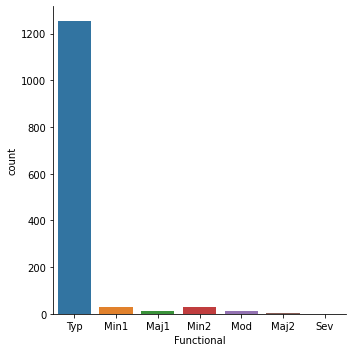

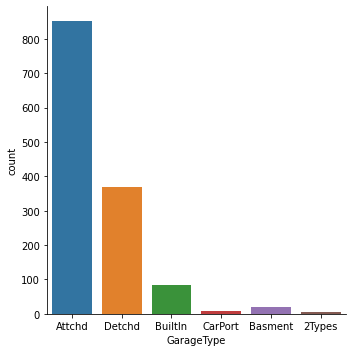

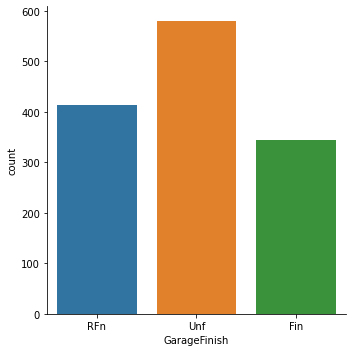

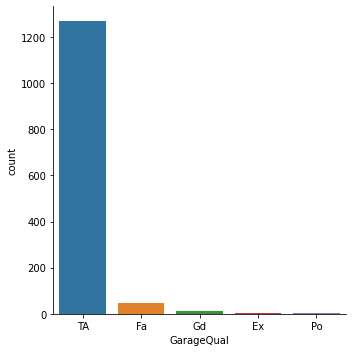

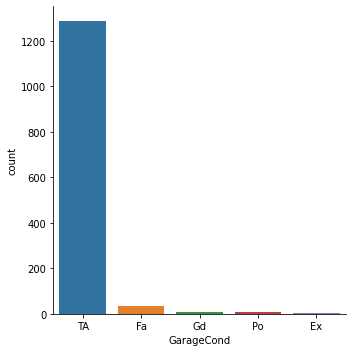

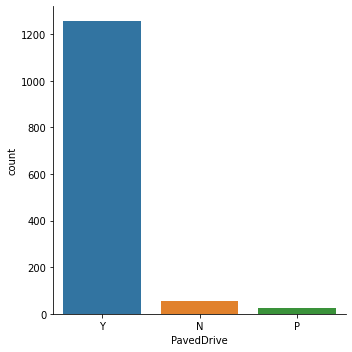

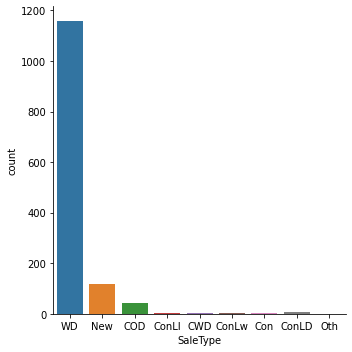

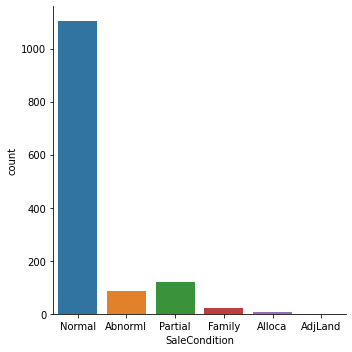

In [249]:
#Relationship with categorical features

for i in cats:
  sns.catplot(data=df,x=i,kind='count')

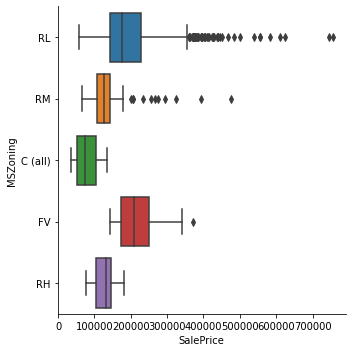

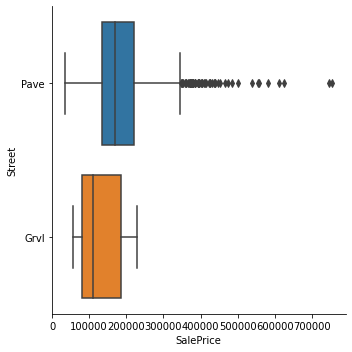

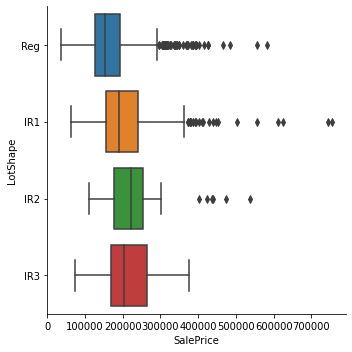

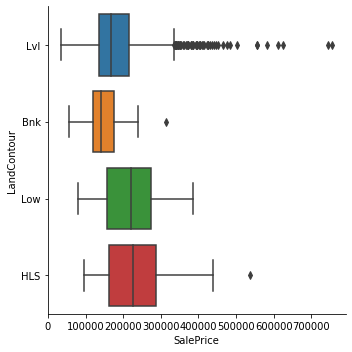

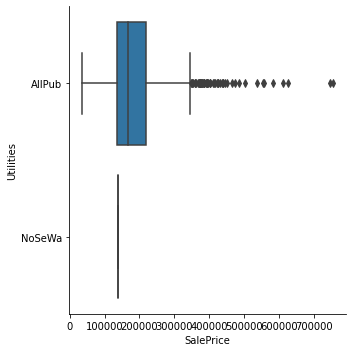

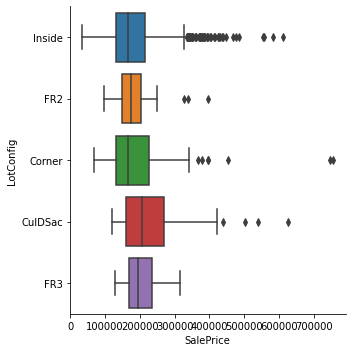

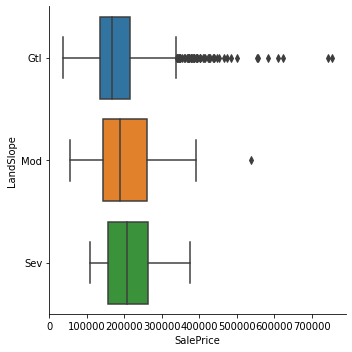

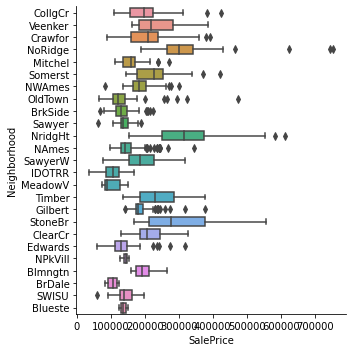

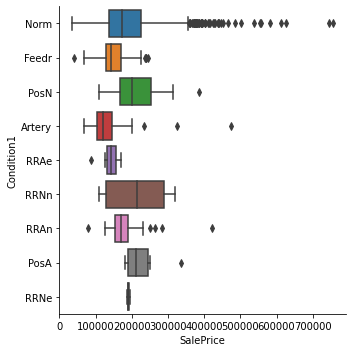

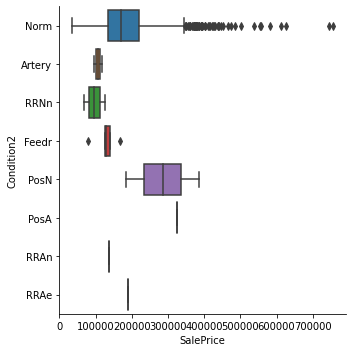

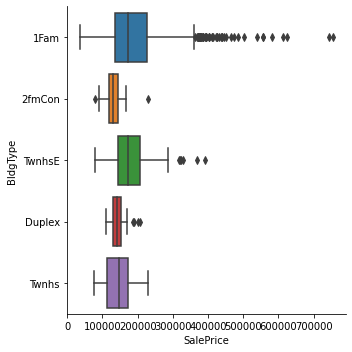

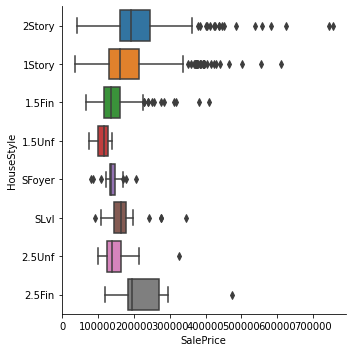

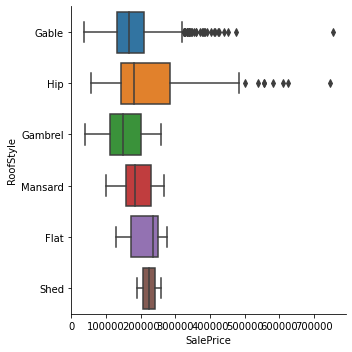

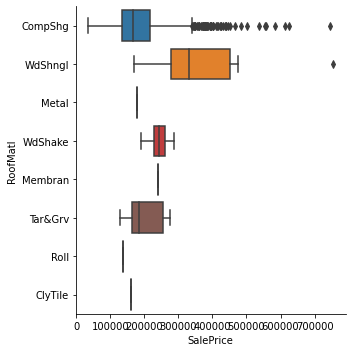

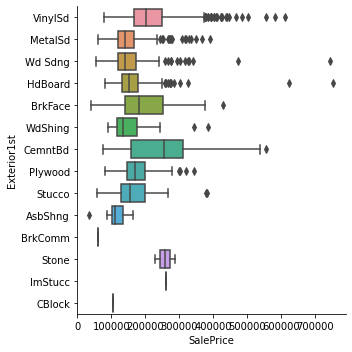

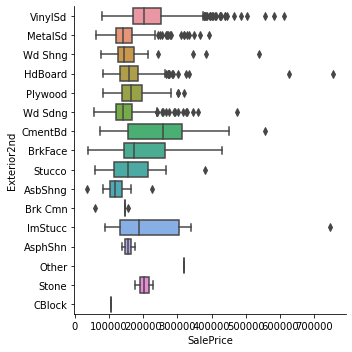

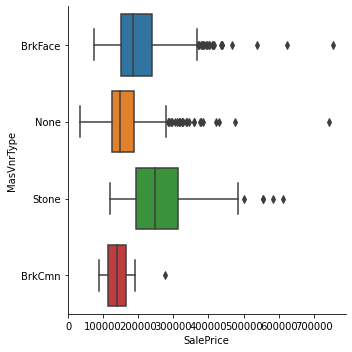

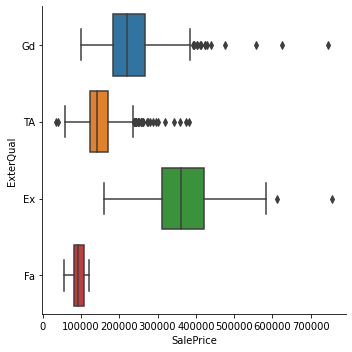

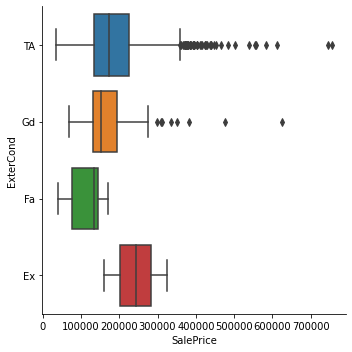

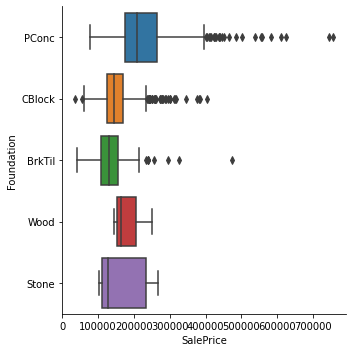

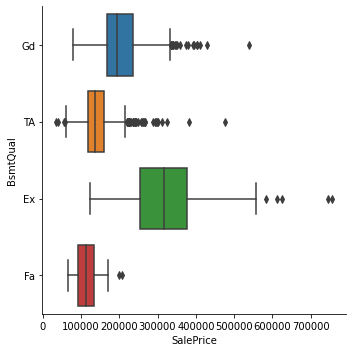

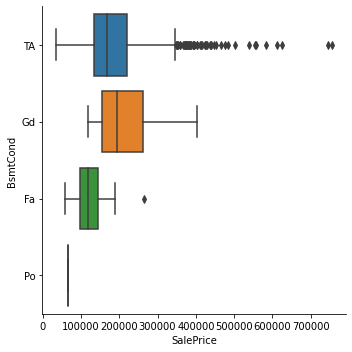

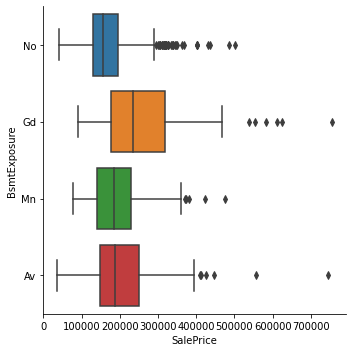

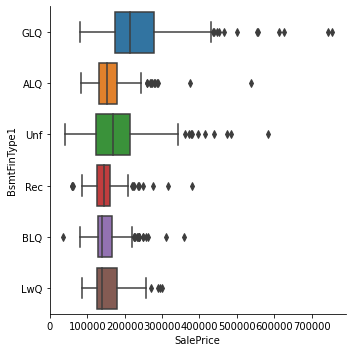

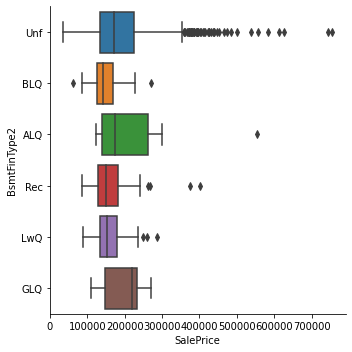

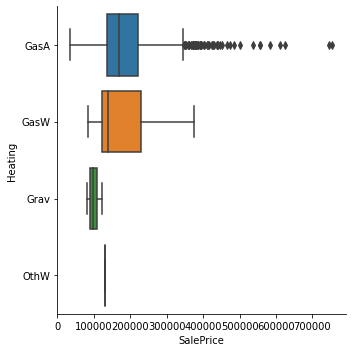

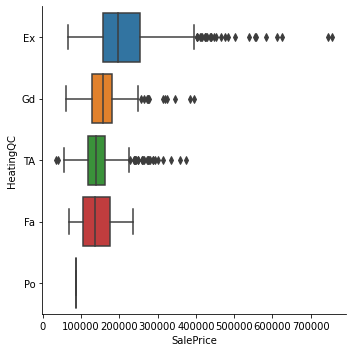

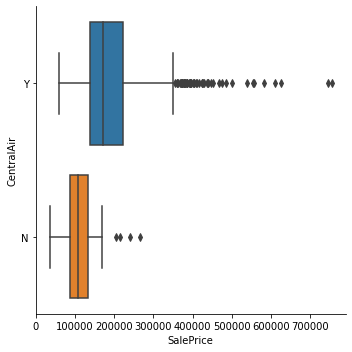

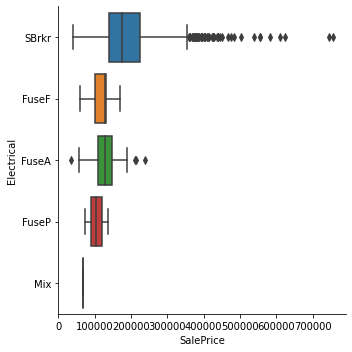

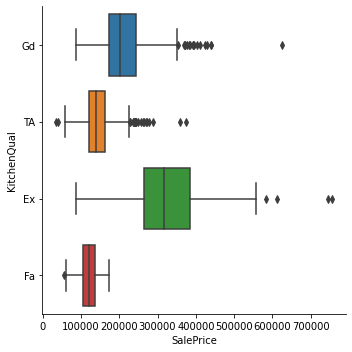

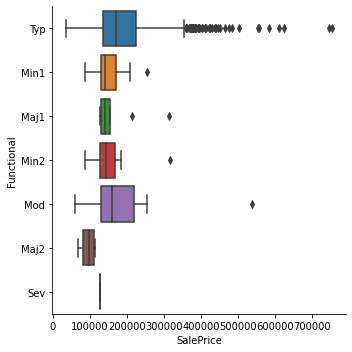

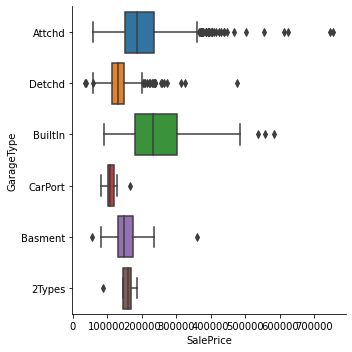

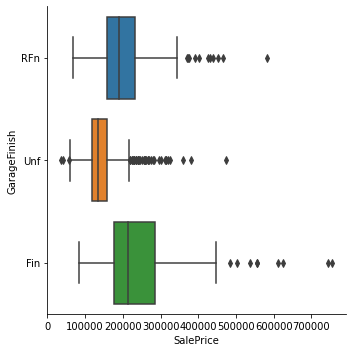

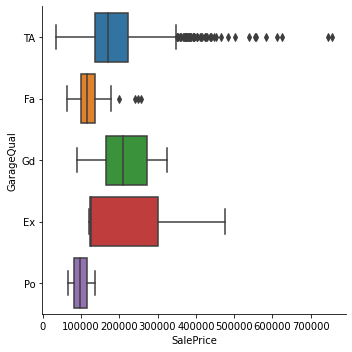

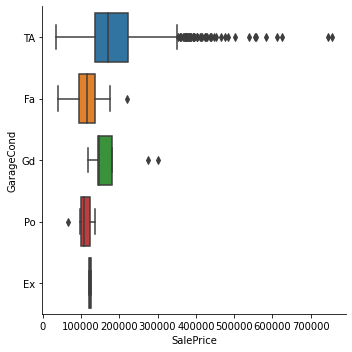

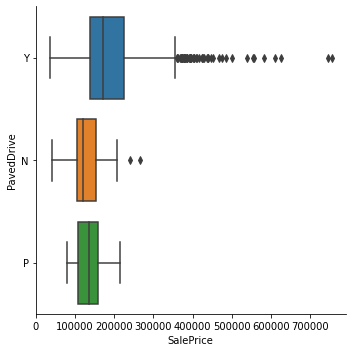

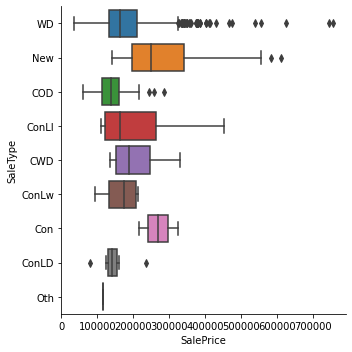

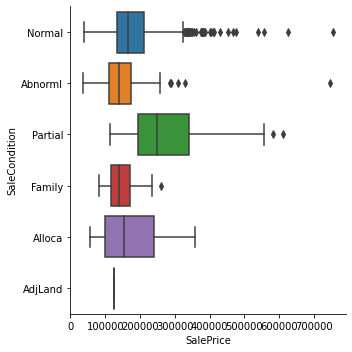

In [250]:

for i in cats:
  sns.catplot(data=df,x='SalePrice',y=i,kind='box')

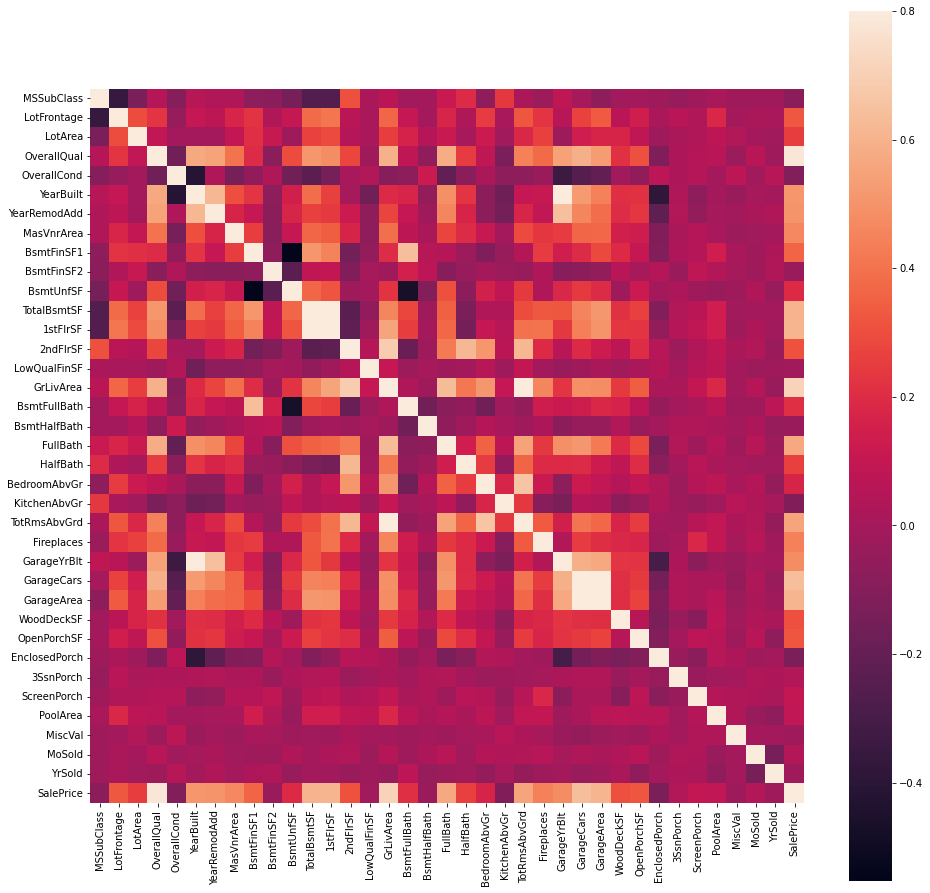

In [251]:
#correlations
plt.subplots(figsize=(16, 16))


sns.heatmap(df.corr(), vmax=.8, square=True);

In [252]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.358160,-0.134158,0.051690,-0.098153,0.056456,0.038513,0.031333,-0.069053,-0.079329,...,-0.010175,-0.000359,-0.022598,-0.041391,-0.022748,0.010199,-0.021512,-0.016283,-0.021591,-0.079599
LotFrontage,-0.358160,1.000000,0.297748,0.226289,-0.043373,0.101577,0.078086,0.176002,0.219077,0.039043,...,0.068108,0.143339,0.015528,0.064049,0.031865,0.185851,-0.002243,0.013575,0.011157,0.327835
LotArea,-0.134158,0.297748,1.000000,0.090451,0.001415,-0.005022,0.001681,0.096727,0.210148,0.110493,...,0.167822,0.084942,-0.017968,0.019326,0.038489,0.077050,0.040824,0.000118,-0.012066,0.254757
OverallQual,0.051690,0.226289,0.090451,1.000000,-0.163080,0.570668,0.549460,0.401175,0.197441,-0.086014,...,0.218570,0.307615,-0.116931,0.026470,0.045257,0.064570,-0.029351,0.062641,-0.013949,0.783546
OverallCond,-0.098153,-0.043373,0.001415,-0.163080,1.000000,-0.417330,0.035076,-0.141080,-0.060068,0.035698,...,-0.012947,-0.060429,0.071473,0.023789,0.053759,-0.003544,0.077314,-0.011772,0.056340,-0.108627
YearBuilt,0.056456,0.101577,-0.005022,0.570668,-0.417330,1.000000,0.617156,0.299410,0.224264,-0.070403,...,0.212296,0.216793,-0.385415,0.028982,-0.070809,0.001006,-0.033493,0.004396,-0.007898,0.504297
YearRemodAdd,0.038513,0.078086,0.001681,0.549460,0.035076,0.617156,1.000000,0.168311,0.099681,-0.085268,...,0.201057,0.231129,-0.218452,0.039422,-0.052513,0.003354,-0.001379,0.014552,0.034503,0.501435
MasVnrArea,0.031333,0.176002,0.096727,0.401175,-0.141080,0.299410,0.168311,1.000000,0.253015,-0.083303,...,0.149182,0.129015,-0.112225,0.015221,0.052474,0.009334,-0.028975,-0.013461,-0.001521,0.465811
BsmtFinSF1,-0.069053,0.219077,0.210148,0.197441,-0.060068,0.224264,0.099681,0.253015,1.000000,-0.064855,...,0.187178,0.107561,-0.105669,0.026811,0.051906,0.142708,0.007869,-0.021242,0.023958,0.359677
BsmtFinSF2,-0.079329,0.039043,0.110493,-0.086014,0.035698,-0.070403,-0.085268,-0.083303,-0.064855,1.000000,...,0.061206,0.004211,0.045668,-0.031475,0.085865,0.041148,0.006246,-0.022039,0.032855,-0.031226


In [253]:
df.drop_duplicates(inplace=True)

In [254]:
df["SalePrice"].groupby(by=df["MSZoning"]).describe()

,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
C (all),8.0,78172.500000,34826.592664,35311.0,51994.75,74700.0,104082.0,133900.0
FV,62.0,214888.129032,53437.371453,144152.0,173799.75,207900.0,250000.0,370878.0
RH,11.0,126539.454545,32315.013899,76000.0,105300.00,133000.0,145000.0,181000.0
RL,1066.0,196479.941839,79950.140759,58500.0,142218.75,177000.0,228837.5,755000.0
RM,191.0,131409.785340,49003.474691,66500.0,107200.00,125000.0,143000.0,475000.0


In [255]:
px.histogram(data_frame=df, x="Neighborhood", y="SalePrice", 
            color="Neighborhood")

In [256]:
!pip install datasist

In [257]:
from datasist.structdata import detect_outliers

In [258]:
i= detect_outliers(df,0,['SalePrice'])

In [259]:
df.drop(i,axis=0,inplace=True)

In [260]:
df.shape

(1282, 75)

In [261]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [262]:
df.isna().sum().sum()

0

In [263]:
cats = df.select_dtypes("object").columns
cats

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [264]:
df["LotShape"] = df["LotShape"].map({"Reg": 3, "IR1": 2, "IR2": 1, "IR3": 0})
df["LandContour"] = df["LandContour"].map({"Lvl": 3, "Bnk": 2, "HLS": 1, "Low": 0})
df["Utilities"] = df["Utilities"].map({"AllPub": 3, "NoSeWa": 1})

In [265]:
#df=pd.get_dummies(df,columns=['MSZoning', 'Street',
       #'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       #'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       #'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       #'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       #'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       #'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       #'PavedDrive', 'SaleType', 'SaleCondition'],drop_first=True)


In [266]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [267]:

le = LabelEncoder()

for item in cats:
    le.fit(df[item])
    df[item] = le.transform(df[item])


for cat in cats:
    print(f"The current column is : {cat}\n")
    print(df[cat].value_counts())
    print("-" *100 +"\n\n")

The current column is : MSZoning

3    1013
4     189
1      61
2      11
0       8
Name: MSZoning, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : Street

1    1277
0       5
Name: Street, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : LotShape

3    806
2    433
1     34
0      9
Name: LotShape, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : LandContour

3    1161
2      52
1      39
0      30
Name: LandContour, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : Utilities

1    1281
0       1
Name: Utilities, dtype: int64
----------------------------------------------------------------------------------------------------




In [268]:
df.shape

(1282, 75)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1282 non-null   int64  
 1   MSZoning       1282 non-null   int64  
 2   LotFrontage    1282 non-null   int64  
 3   LotArea        1282 non-null   int64  
 4   Street         1282 non-null   int64  
 5   LotShape       1282 non-null   int64  
 6   LandContour    1282 non-null   int64  
 7   Utilities      1282 non-null   int64  
 8   LotConfig      1282 non-null   int64  
 9   LandSlope      1282 non-null   int64  
 10  Neighborhood   1282 non-null   int64  
 11  Condition1     1282 non-null   int64  
 12  Condition2     1282 non-null   int64  
 13  BldgType       1282 non-null   int64  
 14  HouseStyle     1282 non-null   int64  
 15  OverallQual    1282 non-null   int64  
 16  OverallCond    1282 non-null   int64  
 17  YearBuilt      1282 non-null   int64  
 18  YearRemo

In [270]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,...,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,56.743370,3.024961,69.670827,10330.863495,0.996100,2.588144,2.828393,0.999220,3.000000,0.061622,...,21.779251,3.386115,15.969579,2.709048,44.808112,6.328393,2007.806552,7.524961,3.779251,176086.351794
std,41.715072,0.634182,21.681195,8594.808723,0.062354,0.581083,0.586237,0.027929,1.633949,0.273942,...,61.338076,29.410920,57.010975,39.992393,518.961506,2.696565,1.331192,1.594708,1.061176,58502.553213
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,20.000000,3.000000,60.000000,7591.500000,1.000000,2.000000,3.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,134000.000000
50%,50.000000,3.000000,69.000000,9501.500000,1.000000,3.000000,3.000000,1.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,165000.000000
75%,70.000000,3.000000,78.000000,11451.500000,1.000000,3.000000,3.000000,1.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,210000.000000
max,190.000000,4.000000,313.000000,164660.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,345000.000000


In [271]:
out_outliers = detect_outliers(df, 0, ["PoolArea"])
df.drop(out_outliers, axis=0, inplace=True)
df.shape

(1276, 75)

In [272]:
from sklearn.model_selection import train_test_split


In [273]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [274]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65,8450,1,3,3,1,4,0,...,0,0,0,0,0,2,2008,8,4,208500.0
1,20,3,80,9600,1,3,3,1,2,0,...,0,0,0,0,0,5,2007,8,4,181500.0
2,60,3,68,11250,1,2,3,1,4,0,...,0,0,0,0,0,9,2008,8,4,223500.0
3,70,3,60,9550,1,2,3,1,0,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,60,3,84,14260,1,2,3,1,2,0,...,0,0,0,0,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62,7917,1,3,3,1,4,0,...,0,0,0,0,0,8,2007,8,4,175000.0
1456,20,3,85,13175,1,3,3,1,4,0,...,0,0,0,0,0,2,2010,8,4,210000.0
1457,70,3,66,9042,1,3,3,1,4,0,...,0,0,0,0,2500,5,2010,8,4,266500.0
1458,20,3,68,9717,1,3,3,1,4,0,...,112,0,0,0,0,4,2010,8,4,142125.0


In [275]:
(x_train,x_test,y_train,y_test) = train_test_split(x,y,test_size=0.25)

In [276]:
stscaler = StandardScaler()
stscaler.fit(x_train)

X_train = stscaler.transform(x_train)
X_test = stscaler.transform(x_test)

In [277]:
select = SelectKBest(score_func=chi2, k=40)
Z = select.fit_transform(x.astype(int), y.astype(int))#X_train.astype(int) 

In [278]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models = {
    'LR': LinearRegression(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor()
}


for name, model in models.items():
    print(f"Model: {name}")
    print("-"*20)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
    print(f"Train R2: {r2_score(y_train, y_pred_train)}")
    print(f"Test R2: {r2_score(y_test, y_pred_test)}")
    print("\n")

Model: LR
--------------------
Train MAE: 13821.330546840994
Test MAE: 16555.14314429987
Train RMSE: 20133.092694226587
Test RMSE: 23049.95953177707
Train R2: 0.8782097111026983
Test R2: 0.8545756974293031


Model: SVM
--------------------
Train MAE: 44773.54822311824
Test MAE: 48867.4990887296
Train RMSE: 59010.22332615897
Test RMSE: 63750.70948005884
Train R2: -0.04627582569225086
Test R2: -0.1124146506674144


Model: KNN
--------------------
Train MAE: 20527.405433646814
Test MAE: 26849.10846394984
Train RMSE: 28144.23842780859
Test RMSE: 37092.95610574629
Train R2: 0.7620034414546705
Test R2: 0.6234006670940111


Model: DT
--------------------
Train MAE: 0.0
Test MAE: 23298.35423197492
Train RMSE: 0.0
Test RMSE: 32388.02648920128
Train R2: 1.0
Test R2: 0.7128785577942065


Model: RF
--------------------
Train MAE: 5627.849289446185
Test MAE: 16363.337429467087
Train RMSE: 8119.230756108257
Test RMSE: 23599.240260137445
Train R2: 0.9801928749343931
Test R2: 0.8475621907403483


Mode